<div style="text-align: center;"><h1>Clusterização com dataset normalizado </h1> </div>

### Imports e setup

In [12]:
import pandas as pd
import streamlit as st
import plotly.express as px
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import metrics
from plotly.subplots import make_subplots
from sklearn.base import TransformerMixin
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import pairwise_distances

color_scale = ['#00ccff','#cc00ff','#ffcc00','#0066bb','#6600bb','#bb0066','#bb6600','#ff0066','#66ff66','#ee0503']
clustering_cols = [ 'Sex', 'Smoker', 'HvyAlcoholConsump','PhysActivity','Fruits','Veggies','HighBP', 'HighChol','Stroke','HeartDiseaseorAttack','DiffWalk','Diabetes_012','BMI']

In [13]:
df = pd.read_parquet('../dfCleaned.parquet', columns=clustering_cols)
df.head()

,Sex,Smoker,HvyAlcoholConsump,PhysActivity,Fruits,Veggies,HighBP,HighChol,Stroke,HeartDiseaseorAttack,DiffWalk,Diabetes_012,BMI
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,28.0
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0
3,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,24.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,25.0


### Gráfico de cotovelo

Realização de um gráfico de cotovelo para melhor visualização do número ideal de clusters no nosso dataset.

In [8]:
valores_k = []
inercias = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, n_init=10 , random_state=42).fit(df)
    valores_k.append(k)
    inercias.append(kmeans.inertia_)

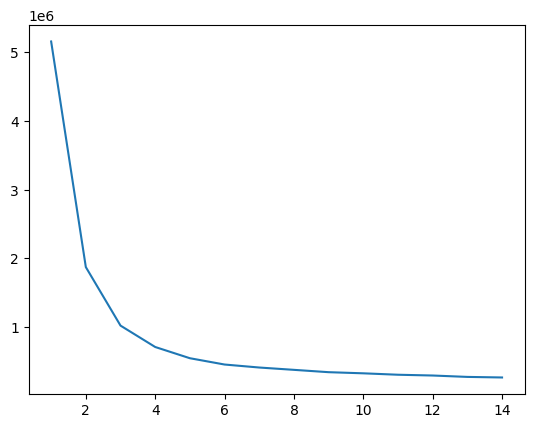

In [9]:
fig, ax = plt.subplots()
ax.plot(valores_k, inercias,)
plt.show()

Número de clusters ideal = 2.

### K-means

In [14]:
n_clusters = 2

def clusterize_kmeans(df: pd.DataFrame) -> pd.Series:
    X = df.values
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=4294967295)
    return kmeans.fit_predict(X)

def plot_cluster_kmeans(df: pd.DataFrame, cluster_col: str, cluster_name: str):
    df[cluster_col] = df[cluster_col].astype(str)
    
    cluster_summary = df.groupby(cluster_col)[clustering_cols].mean()
    
    for c in clustering_cols:
        fig = px.bar(cluster_summary, x=cluster_summary.index, y=c,
                     color=cluster_summary.index, color_discrete_sequence=color_scale,
                     labels={c: f'Média de {c}'})
        fig.show()

### Resultados com K-means

In [15]:
df_kmeans = df.copy()
df_kmeans['cluster'] = clusterize_kmeans(df_kmeans)
plot_cluster_kmeans(df_kmeans, 'cluster', 'Clusters')

d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Silhouette plot

In [3]:
valores_k = []
s = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(df)
    valores_k.append(i)
    s.append(metrics.silhouette_score(df, kmeans.labels_))

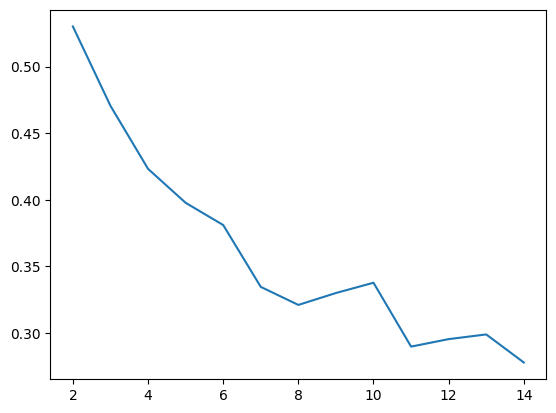

In [5]:
fig, ax = plt.subplots()
ax.plot(valores_k, s)
plt.show()

### Dataset clusterizado

In [17]:
df_kmeans.to_parquet('../ClustResult/dfKmeans.parquet')
df_kmeans.to_csv('../ClustResult/dfKmeans.csv', index=False)